### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Load and View Data

In [2]:
raw_data = pd.read_csv('train.csv')

In [3]:
raw_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
raw_data.info()  # confirmed no duplicate names.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Drop columns, replace values, and create dummies

In [6]:
# raw_data['Ticket'].unique()
data_drop = raw_data.drop(['Name', 'Ticket'], axis = 1)
data_drop.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S


In [7]:
data_drop['Sex'] = data_drop['Sex'].replace(['female', 'male'], [0, 1])
data_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S


In [8]:
data_drop['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [9]:
data_drop['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
data_drop['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
data_drop['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data_drop['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
data_drop_cabin = data_drop.drop('Cabin', axis=1)
data_drop_cabin.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S


In [14]:
class_columns = pd.get_dummies(data_drop_cabin['Pclass'], drop_first = True) # dummies for class
class_columns = class_columns.rename(columns={2:'2nd Class', 3:'3rd Class'})
data_class = pd.concat([data_drop_cabin, class_columns], axis=1).drop('Pclass', axis=1)
data_class.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,2nd Class,3rd Class
0,1,0,1,22.0,1,0,7.2500,S,0,1
1,2,1,0,38.0,1,0,71.2833,C,0,0
2,3,1,0,26.0,0,0,7.9250,S,0,1
3,4,1,0,35.0,1,0,53.1000,S,0,0
4,5,0,1,35.0,0,0,8.0500,S,0,1


In [15]:
embarked_columns = pd.get_dummies(data_class['Embarked'], drop_first = True) # dummies for embark
embarked_columns = embarked_columns.rename(columns={'Q':'Queenstown', 'S':'Southampton'})
data_dummy = pd.concat([data_class, embarked_columns], axis = 1).drop('Embarked', axis=1)
data_dummy.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,2nd Class,3rd Class,Queenstown,Southampton
0,1,0,1,22.0,1,0,7.2500,0,1,0,1
1,2,1,0,38.0,1,0,71.2833,0,0,0,0
2,3,1,0,26.0,0,0,7.9250,0,1,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,0,1
4,5,0,1,35.0,0,0,8.0500,0,1,0,1


### Visualizing the Data

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

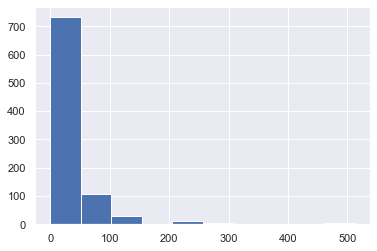

In [16]:
plt.hist(data_dummy['Fare']) # Fare has a couple outliers

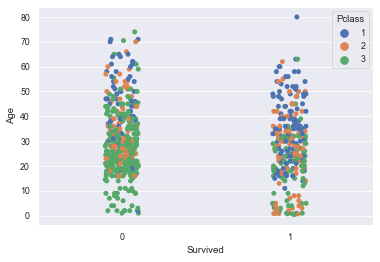

In [17]:
data_age = data_drop_cabin.dropna(how='any', axis=0)
sns.set(context = 'paper')
sns.stripplot(x=data_age['Survived'], y=data_age['Age'], hue = data_age['Pclass'])
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

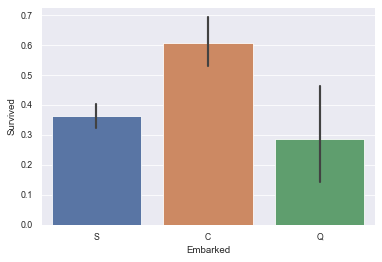

In [18]:
sns.barplot(x='Embarked', y='Survived', data=data_age)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

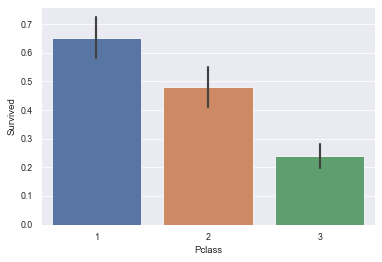

In [19]:
sns.barplot(x='Pclass', y='Survived', data=data_age)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

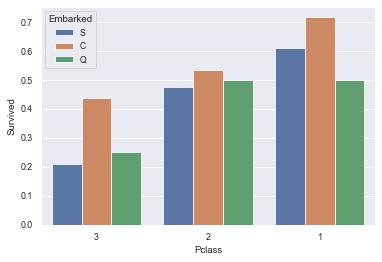

In [20]:
sns.barplot(x='Pclass', y='Survived', ci = None, hue='Embarked', order=[3,2,1], data=data_age)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

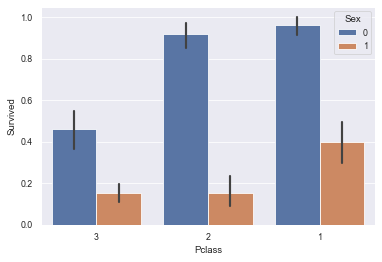

In [21]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', order=[3,2,1], data=data_age)

### Scale Numerical Data 

In [22]:
data_dummy.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,2nd Class,3rd Class,Queenstown,Southampton
0,1,0,1,22.0,1,0,7.2500,0,1,0,1
1,2,1,0,38.0,1,0,71.2833,0,0,0,0
2,3,1,0,26.0,0,0,7.9250,0,1,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,0,1
4,5,0,1,35.0,0,0,8.0500,0,1,0,1


In [23]:
numerical_features = pd.DataFrame()
numerical_features['Scaled Age'] = data_dummy['Age']
numerical_features['Scaled Fare'] = data_dummy['Fare']
# numerical_features['Scaled SibSp'] = data_dummy['SibSp']
# numerical_features['Scaled Parch'] = data_dummy['Parch']

In [24]:
numerical_features.head(1)

,Scaled Age,Scaled Fare
0,22.0,7.25


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(numerical_features)
num_feat_scal = scaler.transform(numerical_features)
num_feat_scal_df = pd.DataFrame(data=num_feat_scal, columns=['Age', 'Fare', 
#                                                              'SibSp', 'Parch'
                                                            ])
num_feat_scal_df.head(1)

,Age,Fare
0,-0.530377,-0.502445


In [26]:
data_dummy['Scaled Age'] = num_feat_scal_df['Age']
data_dummy['Scaled Fare'] = num_feat_scal_df['Fare']
data_scaled = data_dummy.drop(['Age', 'Fare'], axis=1)
data_scaled.head(1)

,PassengerId,Survived,Sex,SibSp,Parch,2nd Class,3rd Class,Queenstown,Southampton,Scaled Age,Scaled Fare
0,1,0,1,1,0,0,1,0,1,-0.530377,-0.502445


### Assign Numbers to Embarked

In [27]:
# data_scaled['Embarked'] = data_scaled['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3])
# data_scaled.head(5)

### KNN to Impute Missing Age Values

In [28]:
from sklearn.impute import KNNImputer

In [29]:
data_scaled.columns.values

array(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', '2nd Class',
       '3rd Class', 'Queenstown', 'Southampton', 'Scaled Age',
       'Scaled Fare'], dtype=object)

In [30]:
imputer = KNNImputer(n_neighbors=5)
data_impute = imputer.fit_transform(data_scaled.drop('Survived', axis=1))
data_impute = pd.DataFrame(data=data_impute, columns=['PassengerId', 'Sex', 'SibSp', 'Parch', '2nd Class',
       '3rd Class', 'Queenstown', 'Southampton', 'Scaled Age',
       'Scaled Fare'])

data_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Sex          891 non-null    float64
 2   SibSp        891 non-null    float64
 3   Parch        891 non-null    float64
 4   2nd Class    891 non-null    float64
 5   3rd Class    891 non-null    float64
 6   Queenstown   891 non-null    float64
 7   Southampton  891 non-null    float64
 8   Scaled Age   891 non-null    float64
 9   Scaled Fare  891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


In [31]:
data_impute['Survived'] = data_scaled['Survived']
data_impute.head(1)

,PassengerId,Sex,SibSp,Parch,2nd Class,3rd Class,Queenstown,Southampton,Scaled Age,Scaled Fare,Survived
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.530377,-0.502445,0


### Create Booleans for Familial Columns

In [32]:
# Resulted in model with worse results.

In [33]:
def family_boolean(element):
    if element > 0:
        return int(1)
    else:
        return element

data_impute['SibSp'] = pd.DataFrame(data_impute['SibSp'].apply(family_boolean)[0::], columns=['SibSp'])
data_impute['SibSp'].value_counts()

0.0    608
1.0    283
Name: SibSp, dtype: int64

In [34]:
data_impute['Parch'] = pd.DataFrame(data_impute['Parch'].apply(family_boolean)[0::], columns=['Parch'])
data_impute['Parch'].value_counts()

0.0    678
1.0    213
Name: Parch, dtype: int64

### Implement Random Forest Classification Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
estimators = ['Sex', 'SibSp', 'Parch', '2nd Class',
       '3rd Class', 'Queenstown', 'Southampton', 'Scaled Age',
       'Scaled Fare']

features = data_impute[estimators]
target = data_impute['Survived']

In [37]:
# randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators = 100)
# model = randomforest.fit(features, target)

### Improve Performance through Boosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
adaboost = AdaBoostClassifier(random_state=0)
model = adaboost.fit(features, target)

### Check Important Features

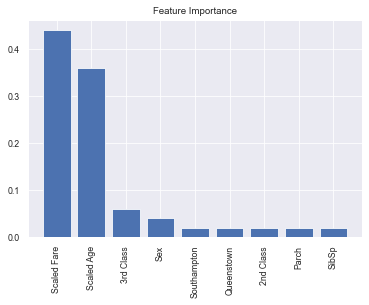

In [40]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [estimators[i] for i in indices]
plt.figure()
plt.title('Feature Importance')
plt.bar(range(len(estimators)), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

### Test Data

In [41]:
test_data = pd.read_csv('test.csv')

In [42]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
data_test_drop = test_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_test_drop['Sex'] = data_test_drop['Sex'].replace(['female', 'male'], [0, 1])

test_class = pd.get_dummies(data_test_drop['Pclass'], drop_first = True) # dummies for class
test_class = test_class.rename(columns={2:'2nd Class', 3:'3rd Class'})
data_test_class = pd.concat([data_test_drop, test_class], axis=1).drop('Pclass', axis=1)

embarked_test_columns = pd.get_dummies(data_test_class['Embarked'], drop_first = True) # dummies for embark
embarked_test_columns = embarked_test_columns.rename(columns={'Q':'Queenstown', 'S':'Southampton'})
data_test_final = pd.concat([data_test_class, embarked_test_columns], axis = 1).drop('Embarked', axis=1)

test_features = pd.DataFrame()
test_features['Scaled Age'] = data_test_final['Age']
test_features['Scaled Fare'] = data_test_final['Fare']

test_feat_scal = scaler.transform(test_features)
test_feat_scal_df = pd.DataFrame(data=test_feat_scal, columns=['Age', 'Fare'])

data_test_final['Scaled Age'] = test_feat_scal_df['Age']
data_test_final['Scaled Fare'] = test_feat_scal_df['Fare']
data_test_scaled = data_test_final.drop(['Age', 'Fare'], axis=1)

# data_test_scaled['Embarked'] = data_test_scaled['Embarked'].replace(['S', 'Q', 'C'], [1, 2, 3])

data_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   2nd Class    418 non-null    uint8  
 5   3rd Class    418 non-null    uint8  
 6   Queenstown   418 non-null    uint8  
 7   Southampton  418 non-null    uint8  
 8   Scaled Age   332 non-null    float64
 9   Scaled Fare  417 non-null    float64
dtypes: float64(2), int64(4), uint8(4)
memory usage: 21.4 KB


In [45]:
data_test_impute = imputer.transform(data_test_scaled)
data_test_impute = pd.DataFrame(data=data_test_impute, columns=['PassengerId', 'Sex', 'SibSp', 'Parch', '2nd Class',
       '3rd Class', 'Queenstown', 'Southampton', 'Scaled Age',
       'Scaled Fare'])
data_test_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Sex          418 non-null    float64
 2   SibSp        418 non-null    float64
 3   Parch        418 non-null    float64
 4   2nd Class    418 non-null    float64
 5   3rd Class    418 non-null    float64
 6   Queenstown   418 non-null    float64
 7   Southampton  418 non-null    float64
 8   Scaled Age   418 non-null    float64
 9   Scaled Fare  418 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


In [46]:
data_test_impute['SibSp'] = pd.DataFrame(data_test_impute['SibSp'].apply(family_boolean)[0::], columns=['SibSp'])
data_test_impute['Parch'] = pd.DataFrame(data_test_impute['Parch'].apply(family_boolean)[0::], columns=['Parch'])

In [47]:
predictions = model.predict(data_test_impute[estimators])

### Export csv from formatted dataframe

In [48]:
predictions = pd.DataFrame(predictions, columns=['Predictions'])
predictions.head()

,Predictions
0,0
1,0
2,0
3,0
4,0


In [49]:
# def assign_boolean(element):
#     if element > 0.5:
#         return int(1)
#     else:
#         return int(0)
    
# predictions_binary = predictions['Predictions'].apply(assign_boolean)[0::]
# predictions_binary.head()

In [50]:
# predictions_final = pd.DataFrame(predictions_binary, columns=['Predictions'])

In [51]:
data_export = pd.DataFrame()
data_export['PassengerId'] = data_test_impute['PassengerId']
data_export = data_export.astype('int32')
data_export['Survived'] = predictions['Predictions']
# data_export = pd.concat([data_test_final['PassengerId'], predictions_final['Predictions']])
data_export.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [53]:
data_export.to_csv('Titanic_results_v7.csv', index=False)

# Kaggle Result: 